<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/05_kNearestNeighbor_Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import librart

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1 . Load data

In [0]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

Cloning into 'DS102.K21'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 202 (delta 37), reused 0 (delta 0), pack-reused 133
Receiving objects: 100% (202/202), 2.12 MiB | 5.71 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [0]:
data_train = pd.read_csv("DS102.K21/Social_Network_Ads_Train.csv")

In [0]:
data_test = pd.read_csv("DS102.K21/Social_Network_Ads_Test.csv")

In [0]:
X_train = data_train.iloc[:,[3,4]].values
X_train.shape

(300, 2)

In [0]:
y_train = data_train.iloc[:,-1].values
y_train.shape

(300,)

In [0]:
X_test = data_test.iloc[:,[3,4]].values
X_test.shape

(100, 2)

In [0]:
y_test = data_test.iloc[:,-1].values
y_test.shape

(100,)

# 2 . Normalize data

In [0]:
SC = StandardScaler()

In [0]:
X_train = SC.fit_transform(X_train)

In [0]:
X_test = SC.fit_transform(X_test)

# 3. Build model

In [0]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# 4 . Visualize

In [0]:
def VisualizingDataset(X_, y_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    for i, label in enumerate(np.unique(y_)):
        plt.scatter(X1[y_ == label], X2[y_ == label], color = ListedColormap(('red', 'green'))(i))
        plt.legend(np.unique(y_))

In [0]:
def VisualizingResult(model, X_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    X1_range = np.arange(X1.min()-1, X1.max()+1, 0.01)
    X2_range = np.arange(X2.min()-1, X2.max()+1, 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid = np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    y_grid = model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, y_grid, alpha = 0.5, cmap = ListedColormap(('red','green')))

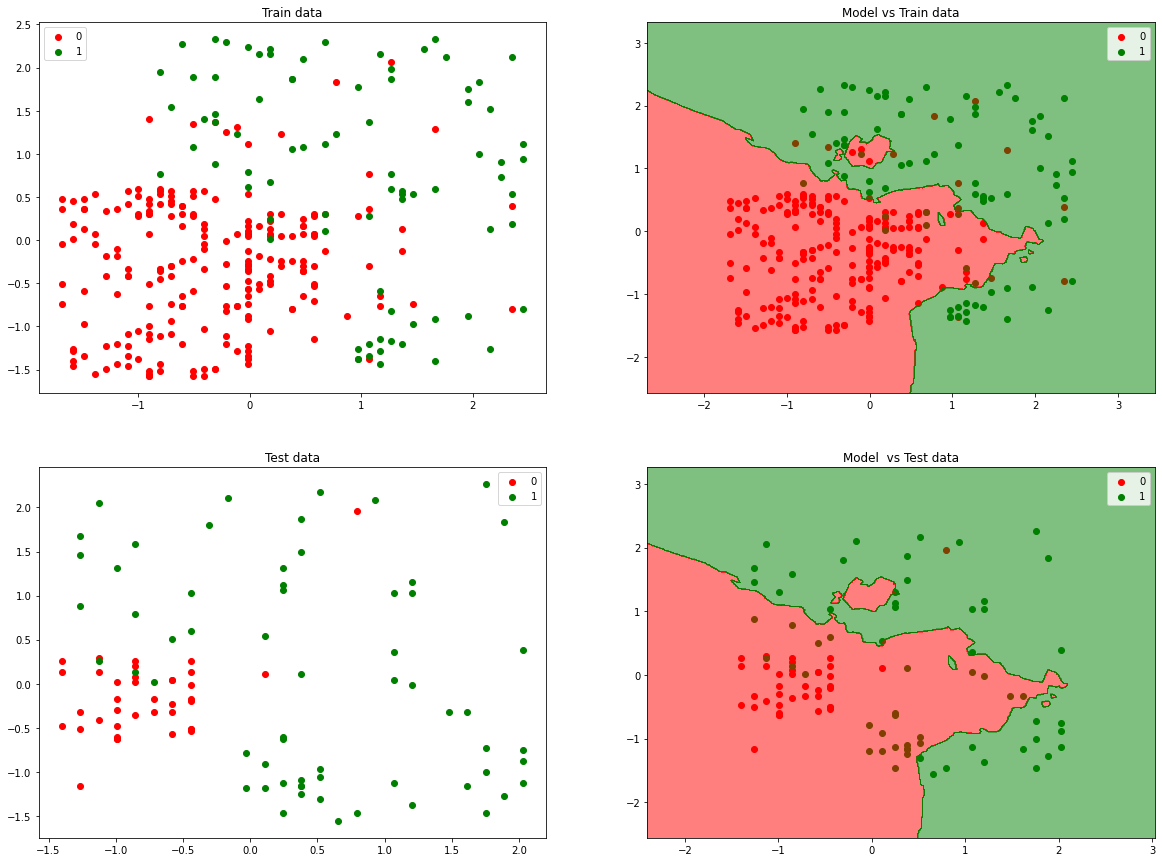

In [0]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
VisualizingDataset(X_train, y_train)
plt.title('Train data')
plt.subplot(2,2,2)
VisualizingDataset(X_train, y_train)
VisualizingResult(classifier, X_train)
plt.title('Model vs Train data')
plt.subplot(2,2,3)
VisualizingDataset(X_test, y_test)
plt.title('Test data')
plt.subplot(2,2,4)
VisualizingDataset(X_test, y_test)
VisualizingResult(classifier, X_test)
plt.title('Model  vs Test data')
plt.show()

# 5 . Build confusion matrix

Train data

In [0]:
cm = confusion_matrix(y_train, classifier.predict(X_train))
print('Confusion matrix in train data: \n', cm)

Confusion matrix in train data: 
 [[205  14]
 [  9  72]]


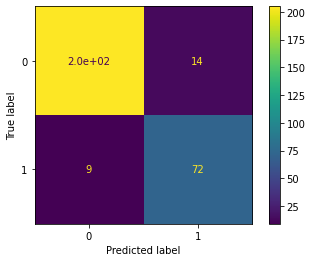

In [0]:
plot_confusion_matrix(classifier, X_train, y_train)

Test data

In [0]:
cm = confusion_matrix(y_test, classifier.predict(X_test))
print('Confusion matrix in train data: \n', cm)

Confusion matrix in train data: 
 [[37  1]
 [27 35]]


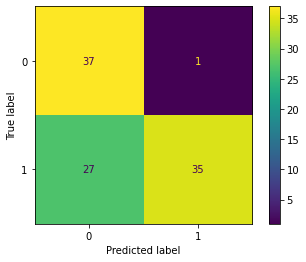

In [0]:
plot_confusion_matrix(classifier, X_test, y_test)

# 6 . Compare

In [0]:
def compare(i_example):
    X = X_test[i_example:i_example + 1]
    y = y_test[i_example]
    y_pred = classifier.predict(X)
    X_inv = SC.inverse_transform(X)
    print(X_inv, y, y_pred)

In [0]:
for i in range(7,12):
    compare(i)

[[4.70e+01 1.13e+05]] 1 [0]
[[3.60e+01 1.25e+05]] 1 [1]
[[3.8e+01 5.0e+04]] 0 [0]
[[4.2e+01 7.0e+04]] 0 [0]
[[3.9e+01 9.6e+04]] 1 [0]
